In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2,os

data_path=('/content/gdrive/My Drive/9. Minor Project/project/dataset')
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels)) #empty dictionary
 
print(label_dict)
print(categories)
print(labels)

{'with_mask': 0, 'without_mask': 1}
['with_mask', 'without_mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 1029 samples, validate on 258 samples
Epoch 1/20
1029/1029 [==============================] - 91s 88ms/step - loss: 0.7092 - accuracy: 0.5481 - val_loss: 0.6709 - val_accuracy: 0.5426
Epoch 2/20
1029/1029 [==============================] - 91s 88ms/step - loss: 0.6296 - accuracy: 0.6200 - val_loss: 0.5742 - val_accuracy: 0.7403
Epoch 3/20
1029/1029 [==============================] - 89s 86ms/step - loss: 0.4204 - accuracy: 0.8202 - val_loss: 0.4002 - val_accuracy: 0.8140
Epoch 4/20
1029/1029 [==============================] - 93s 90ms/step - loss: 0.2670 - accuracy: 0.9018 - val_loss: 0.2235 - val_accuracy: 0.9341
Epoch 5/20
1029/1029 [==============================] - 89s 86ms/step - loss: 0.2009 - accuracy: 0.9281 - val_loss: 0.2251 - val_accuracy: 0.9109
Epoch 6/20
1029/1029 [==============================] - 88s 86ms/step - loss: 0.1577 - accuracy: 0.9417 - val_loss: 0.1588 - val_accuracy: 0.9496
Epoch 7/20
1029/1029 [==============================] - 89s 86ms/step - loss:

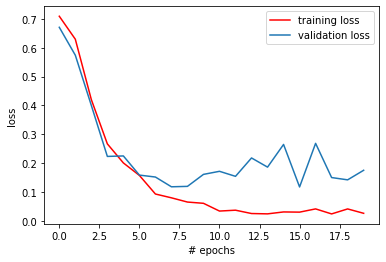

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

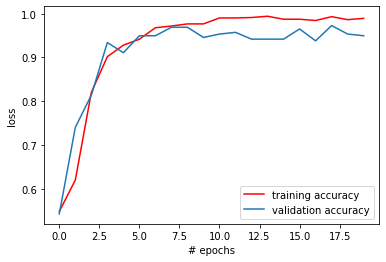

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


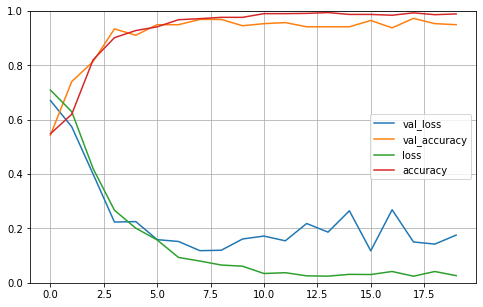

<Figure size 576x432 with 0 Axes>

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
figure=plt.gcf()
figure.set_size_inches(8,6)
#plt.savefig('filename.png',bbox_inches='tight')
plt.savefig('loss_accuracy_graph.png',dpi=300,bbox_inches='tight')


In [ ]:
model.save("model_v3.h5")

In [ ]:
print(model.evaluate(test_data,test_target))

144/144 [==============================] - 3s 22ms/step
[0.22512021164099374, 0.9305555820465088]


In [ ]:
new=test_data[:10]


In [ ]:
y_pred = model.predict_classes(new)
print(y_pred)
print(label_dict)


[0 0 1 1 1 0 1 0 0 0]
{'with_mask': 0, 'without_mask': 1}


AxesImage(54,36;334.8x217.44)


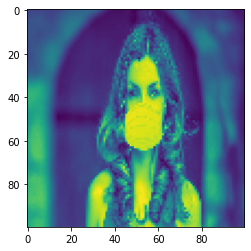

In [ ]:
print(plt.imshow(test_data[0].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


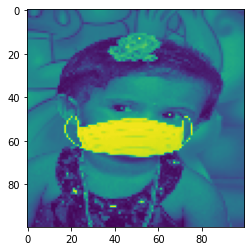

In [ ]:
print(plt.imshow(test_data[1].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


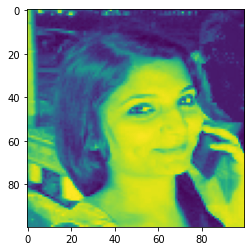

In [ ]:
print(plt.imshow(test_data[2].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


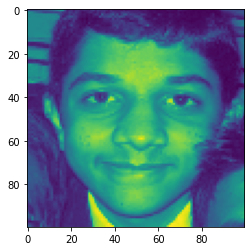

In [ ]:
print(plt.imshow(test_data[3].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


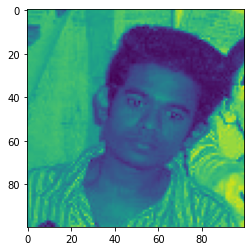

In [ ]:
print(plt.imshow(test_data[4].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


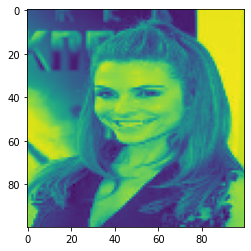

In [ ]:
print(plt.imshow(test_data[5].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


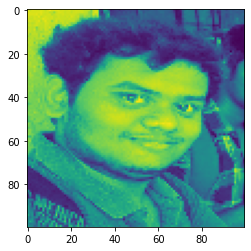

In [ ]:
print(plt.imshow(test_data[6].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


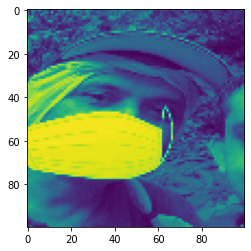

In [ ]:
print(plt.imshow(test_data[7].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


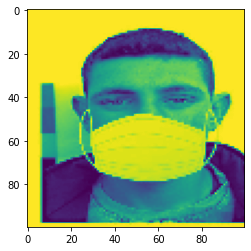

In [ ]:
print(plt.imshow(test_data[8].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


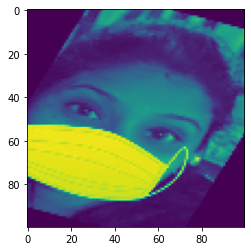

In [ ]:
print(plt.imshow(test_data[9].reshape(100,100)))